# IEDA3302 Project - Group 15

### Conjecture:  A country's employment rate is mainly dependent on the prevalence and affluence of their education system.

In this project, our group aims to verify whether receiving education, and to what extent, is the main factor to being employed.

For this project, we will make a few assumptions:
- the prevalence and affluene of a country's education system is directly linked to the overall literacy rate, as well as mean years of school for both men and women

Our hypothesis for this conjecture is that the greater prevalence and affluence of a country's education system, the higher their employment rate will be.

-

### Collecting and Concatenating Data

Firstly, our group will mainly take 5 different tables from GapMinder:

- the employment rate of those aged 15+
- the unemployment rate of those ages 15+
- the literacy rate of those aged 15+
- the mean years of school for men aged 25+
- the mean years of school for women aged 25+

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
employment = pd.read_csv(r"./aged_15plus_employment_rate_percent.csv", sep=',', index_col = 'country')
unemployment = pd.read_csv(r"./aged_15plus_unemployment_rate_percent.csv", sep=',', index_col = 'country')
literacy = pd.read_csv(r"./literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv", sep=',', index_col = 'country')
yrsinschoolM = pd.read_csv(r"./mean_years_in_school_men_25_years_and_older.csv", sep=',', index_col = 'country')
yrsinschoolW = pd.read_csv(r"./mean_years_in_school_women_25_years_and_older.csv", sep=',', index_col = 'country')

In [3]:
yrsinschool = pd.concat([yrsinschoolM, yrsinschoolW])

In [4]:
employment2 = employment.T.describe().T
unemployment2 = unemployment.T.describe().T
literacy2 = literacy.T.describe().T
yrsinschoolM2 = yrsinschoolM.T.describe().T
yrsinschoolW2 = yrsinschoolW.T.describe().T

yrsinschool2 = yrsinschool.T.describe().T

In [5]:
data = [employment2["mean"], unemployment2["mean"], literacy2["mean"], yrsinschoolM2["mean"], yrsinschoolW2["mean"]]
headers = ["Employment Rate", "Unemployment Rate", "Literacy Rate", "Avg. Years in School (M)", "Avg. Years in School (W)"]

df = pd.concat(data, axis = 1, keys = headers, sort = True)

In [6]:
print(df)

                                Employment Rate  Unemployment Rate  \
Afghanistan                            0.476594           0.020900   
Albania                                0.479406           0.148455   
Algeria                                0.352406           0.178850   
Angola                                 0.649875           0.131150   
Antigua and Barbuda                         NaN           0.060000   
Argentina                              0.541813           0.082346   
Armenia                                0.500875           0.178000   
Australia                              0.600938           0.069008   
Austria                                0.561000           0.050121   
Azerbaijan                             0.592500           0.068489   
Bahamas                                0.668875           0.119026   
Bahrain                                0.680563           0.011300   
Bangladesh                             0.548469           0.031740   
Barbados            

In [21]:
df = df.dropna()

In [72]:
df.max()

Employment Rate              0.856188
Unemployment Rate            0.313250
Literacy Rate                0.997667
Avg. Years in School (M)    10.582500
Avg. Years in School (W)    10.130000
dtype: float64

Above, "df" represents our final dataframe, where we tried to compile all the data files into one frame. To do so, we took the mean of each attribute and then with the different means, we compiled them all into one dataframe.

### Visualization and Correlation

In this part of the project, our group will use visualization to identify a rough correlation, or the lack thereof.

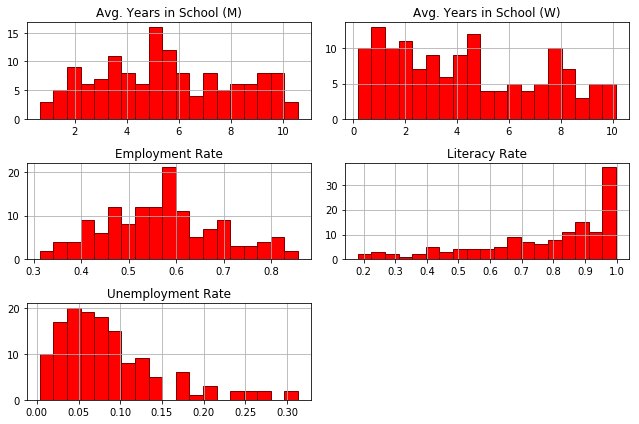

In [22]:
df.hist(bins=19, color='red', edgecolor='maroon', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=True)

plt.tight_layout(rect=(10, 10, 11.5, 11.5))

Above, we first tried to visualize our data in the form of histograms.
From the above data, we can see the following:
- For the average number of years men spend in school, majority of the countries last around 4-10 years. 
- For that of women, there is a decreasing trend on the average number of years spent in school.
- Most countries included in the data have an employment percentage around 60%.
- Whereas, the unemployment percentage generally ranges from 0-15% for most countries.
- The literacy rate shows an increasing trend, where most countries listed have literacy percentages above 50%.

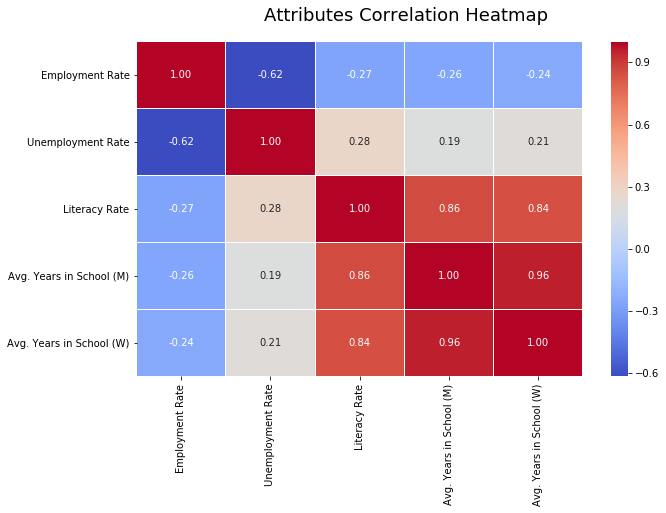

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,4), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.1)
f.subplots_adjust(top=0.9)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=18)

Our group also tried to create a heat map to try and look for any correlations among the different attributes we've selected. 

From the heat map, the correlation of employment rate with literacy rate and average number of years in school for both men and women show a negative relation. The negative correlations imply that as the employment rate increases, the literacy rate and the average number of years are lower.

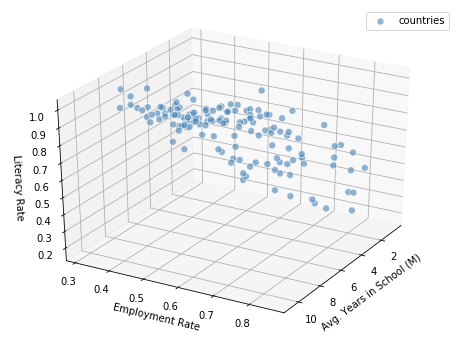

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Avg. Years in School (M)']
ys = df['Employment Rate']
zs = df['Literacy Rate']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = 'steelblue', label = 'countries')

ax.set_xlabel('Avg. Years in School (M)')
ax.set_ylabel('Employment Rate')
ax.set_zlabel('Literacy Rate')

ax.view_init(30,30)
plt.legend()

Above, our group chose to visualize the correlation of three attributes through an 3D scatterplot. We chose three attributes among the five above, namely employment rate, literacy rate, and the average number of years in school among men.

As of now, we can see that the countries on the scatterplot are quite spread out sporadically, so there is no clear correlation between the literacy rate and average years in school, with a country's employment rate. 

### Correlation and Dimensionality Reduction

In this part of the project, our group will first try to reduce the dimension of our data then visualize it similarly as above.

In [48]:
#The next parts are linked to the 3D plot created above

cols = ['Employment Rate', 'Literacy Rate', 'Avg. Years in School (M)']
X = df[cols]

pca = PCA(n_components=3)
pca.fit(X)
X_1 = pca.transform(X)

print('Eigenvectors:\n', pca.components_)
print('Eigenvalues:\n', pca.explained_variance_)
print('Explained Variance Ratio:\n', pca.explained_variance_ratio_)

Eigenvectors:
 [[-0.01202575  0.07156059  0.99736376]
 [ 0.86166552 -0.50532822  0.04664673]
 [ 0.50733412  0.85995492 -0.05558434]]
Eigenvalues:
 [6.65116613 0.01433846 0.01158874]
Explained Variance Ratio:
 [0.99611699 0.00214741 0.0017356 ]


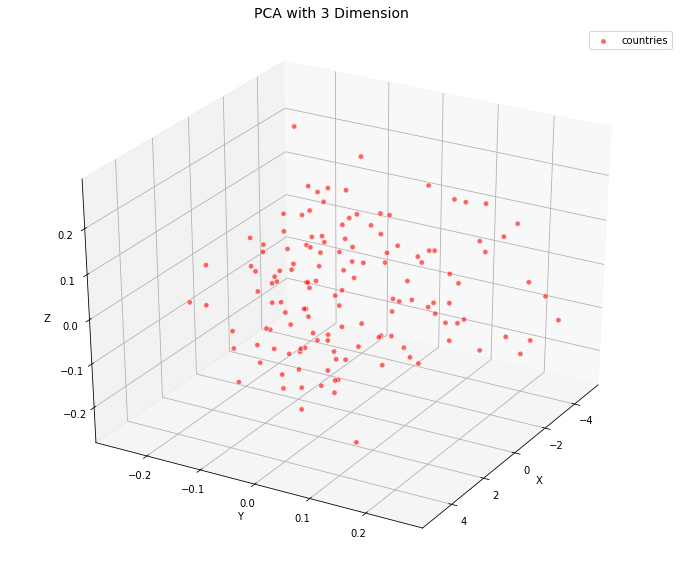

In [46]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
fig.subplots_adjust(top=0.95)
fig.suptitle('PCA with 3 Dimension', fontsize=14)

xs1 = X_1[:,0][:]
ys1 = X_1[:,1][:]
zs1 = X_1[:,2][:]
ax.scatter(xs1, ys1, zs1, s=30, alpha=0.6, edgecolors='w', color = 'red', label='countries')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(30,30)
plt.legend()
plt.draw()

Above, we did projection using PCA without applying dimensionality reduction. From the variance ratios, we can see that the first two axis account for majority of the variance, implying that these two transformed axis capture the essential properties of the entire set of data.

In [50]:
pca = PCA(n_components=2)
pca.fit(X)
X_2 = pca.transform(X)

print('Eigenvectors:\n', pca.components_)
print('Eigenvalues:\n', pca.explained_variance_)
print('Explained Variance Ratio:\n', pca.explained_variance_ratio_)
print('Total explained Variance Ratio:\n', sum(pca.explained_variance_ratio_))

Eigenvectors:
 [[-0.01202575  0.07156059  0.99736376]
 [ 0.86166552 -0.50532822  0.04664673]]
Eigenvalues:
 [6.65116613 0.01433846]
Explained Variance Ratio:
 [0.99611699 0.00214741]
Total explained Variance Ratio:
 0.9982644034053174


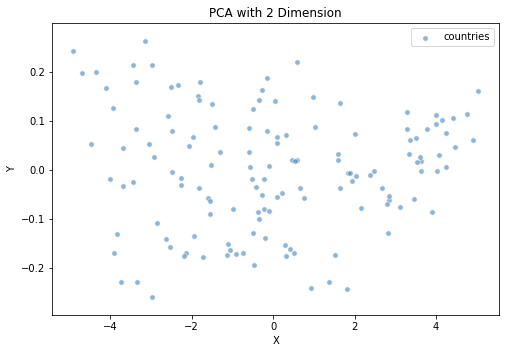

In [43]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(top=0.8)
ax = fig.add_subplot(111)

xs1 = X_2[:,0][:]
ys1 = X_2[:,1][:]
ax.scatter(xs1, ys1, s=30, alpha=0.6, edgecolors='w', color = 'steelblue', label='countries')

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.title('PCA with 2 Dimension')

plt.legend()
plt.draw()

Next, above, we applied dimensionality reduction to reduce it to 2. Even after using dimensionality reduction, there is no distinct relationship among the variables we have presented.

### Regression

At this point of our project, we will apply linear regression and high-dimensional regression. Firstly, we'll be using a scatterplot to view the current distribution.

Text(0.5, 1.0, 'Linear to Employment Rate')

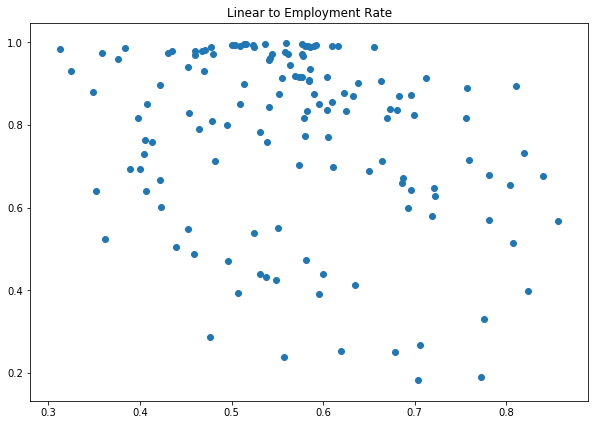

In [63]:
x = df['Employment Rate']
y = df['Literacy Rate']

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(top=1)

plt.scatter(x, y)
plt.title('Linear to Employment Rate')

In [53]:
model = LinearRegression()
x = np.array(x).reshape((-1, 1))
model.fit(x, y)

r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

y_pred = model.predict(x)

Coefficient of determination: 0.07071682385809042
Intercept: 1.0422346132424825
Slope: [-0.47367135]


This regression results in a model like:

$$ Literacy Rate = 1.04223 + (-0.47367) \times Employment Rate $$

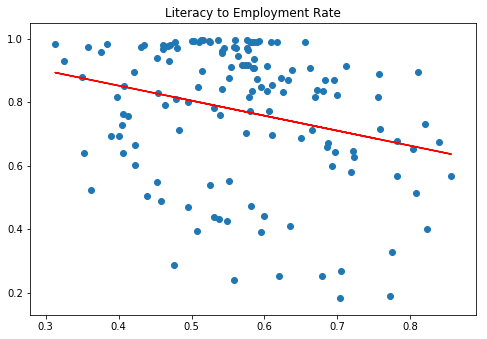

In [65]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(top=0.8)
plt.scatter(x, y)
plt.title('Literacy to Employment Rate')

plt.plot(x, y_pred, color = 'red')
plt.show()

After applying linear regression, we find a predicted relationship - one that opposes the hypothesis made in the beginning of our project. The prediction line highlights that as the employment rate increases, the literacy rate drops from around 90% to 60-70%.

In [66]:
x = df[['Avg. Years in School (M)', 'Avg. Years in School (W)']]
y = df['Employment Rate']

In [67]:
model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.06582054844731555
intercept: 0.6403955359315295
slope: [-0.01489153  0.00265219]


<IPython.core.display.Javascript object>


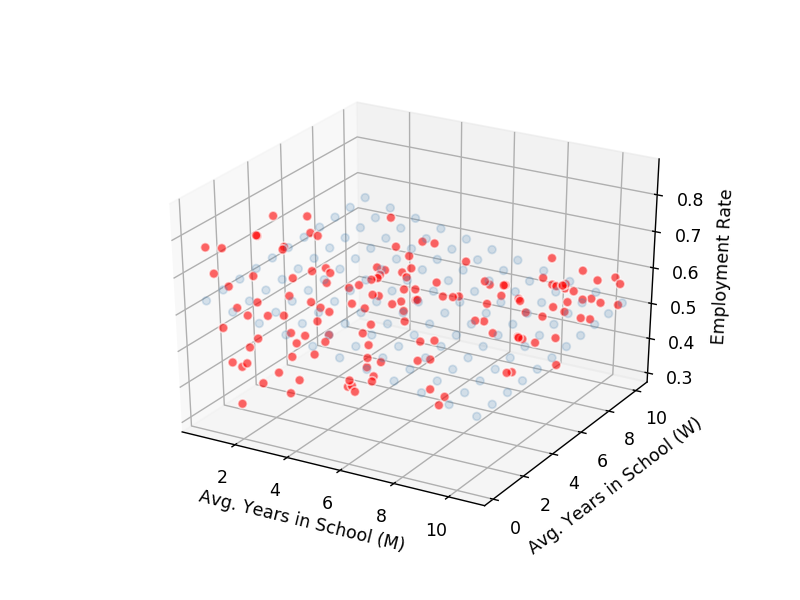

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = df['Avg. Years in School (M)']
ys = df['Avg. Years in School (W)']
zs = df['Employment Rate']
ax.scatter(xs, ys, zs, s=30, alpha=0.6, edgecolors='w', color = 'red')

ax.set_xlabel('Avg. Years in School (M)')
ax.set_ylabel('Avg. Years in School (W)')
ax.set_zlabel('Employment Rate')

xp = np.linspace(min(df['Avg. Years in School (M)']),max(df['Avg. Years in School (M)']),11)
yp = np.linspace(min(df['Avg. Years in School (W)']),max(df['Avg. Years in School (W)']),11)
x,y = np.meshgrid(xp, yp)
z = model.intercept_ + model.coef_[0]*x + model.coef_[1]*y

ax.scatter(x,y,z, alpha=0.2, color = 'steelblue')

plt.draw()
    

Similar to that of the 2D scatterplot above, the countries are scattered and there is not a clear pattern, but a possible prediction. However, there is no distinct relationship between the average years in school of both men and women, with their country's employment rate.

### Classification and Clustering

Finally, we will apply classification and clustering methods to our data.

In [ ]:
#Add all your code here

### Limitations

Within this project, though we have generated reasonable results, there were a few limitations we faced, possibly affecting its accurary.

- Compiling into one dataframe: After generating the mean for each attribute, we concatenated these into one dataframe. However, because each attribute had their own number of countries for data provided, the concatenated dataframe resulted in some cells containing "NaN". With this, we chose to drop the rows that had "NaN" to prevent any programming malfunctions or limitations.

### Summary

To summarize, our group constructed a conjecture, "A country's employment rate is mainly dependent on the prevalence and affluence of their education system", to identify to what extent a country's education system is a factor to their employment rates.

In our project, we included data involving employment and unemployment rates, literacy rates, and mean years in school. We used different statistical analysis methods to identify any form of relationship or dependence, whether causal or not. Our hypothesis was that the greater prevalence and affluence of a country's education system, the higher their employment rate will be.

Majority of our results mainly concluded that there is no direct relationship between the different attributes we have selected, but some of our approaches revealed a predicted pattern, such as when we used linear regression. However, the predicted relationship showed an opposing direction, that the greater the employment rate, the more average the literacy rate.

Therefore, our group declares the conjecture to be inaccurate, that a country's employment rate DOES NOT mainly depend on the prevalence and affluence of their education system.